<a href="https://colab.research.google.com/github/deekshith81/genaivation--bootcap-2025/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score

In [ ]:

iris = datasets.load_iris()

X = iris.data[:, (2, 3)]

y = (iris.target == 0).astype(int)


per_clf = Perceptron()

per_clf.fit(X, y)


y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [ ]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:

X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [ ]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle bo
class_names[y_train[0]]

'Coat'

In [ ]:

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

model = Sequential([
                    Flatten(input_shape=[28, 28]),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(10, activation="softmax")
                    ])

In [ ]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [ ]:

history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6865 - loss: 0.9885 - val_accuracy: 0.8246 - val_loss: 0.5176
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8253 - loss: 0.5060 - val_accuracy: 0.8478 - val_loss: 0.4421
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8413 - loss: 0.4536 - val_accuracy: 0.8580 - val_loss: 0.4154
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8533 - loss: 0.4202 - val_accuracy: 0.8658 - val_loss: 0.3945
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8603 - loss: 0.3972 - val_accuracy: 0.8638 - val_loss: 0.3938
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8652 - loss: 0.3825 - val_accuracy: 0.8602 - val_loss: 0.3892
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8715 - loss: 0.3642 - val_accuracy: 0.8736 - val_loss: 0.3610
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8726 - loss: 0.3575 

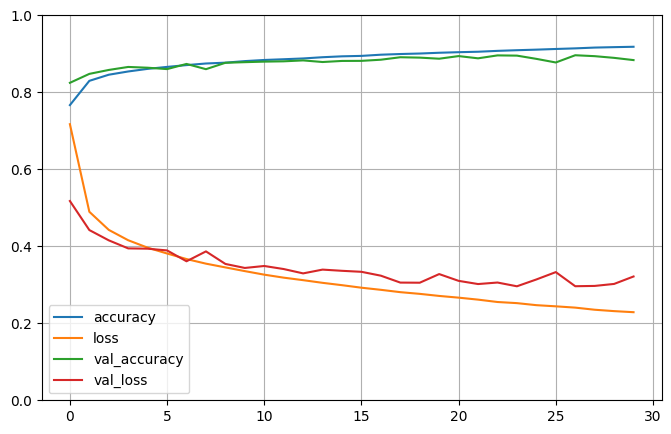

In [12]:

df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1)
plt.show()

In [13]:

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 68.3089


[71.6634750366211, 0.8391000032424927]

In [14]:

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:

y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predicted labels: \n", y_pred)

print(np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted labels: 
 [9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


Actual labels:  [9 2 1]


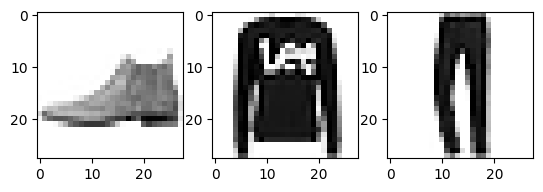

In [16]:

y_new = y_test[:3]
print("Actual labels: ", y_new)

fig, ax = plt.subplots(1,3)
for axi, i in zip(ax.ravel(), np.arange(len(X_new))):
    axi.imshow(X_new[i], cmap='Greys')

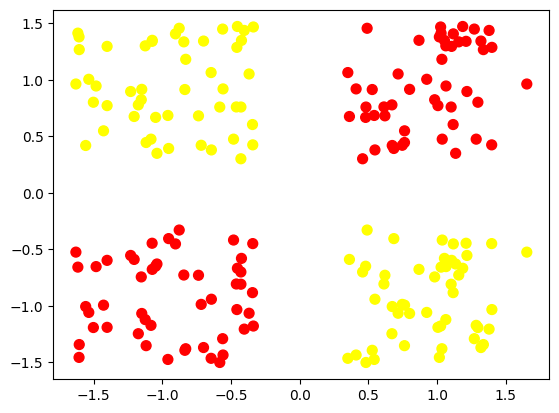

In [18]:

x1 = np.random.uniform(1,3,50)
x2 = np.random.uniform(4,6,50)
y1 = np.random.uniform(1,3,50)
y2 = np.random.uniform(4,6,50)


X_1 = np.vstack([np.append(x1,x2), np.append(y1,y2)]).T
X_2 = np.vstack([np.append(x1,x2), np.append(y2,y1)]).T
X = np.vstack([X_1, X_2])


y_1 = [0 for i in range(len(X_1))]
y_2 = [1 for i in range(len(X_2))]
y = np.append(y_1, y_2)


data = np.hstack([X,y.reshape(-1,1)])


np.random.shuffle(data)

X, y = data[:,:2], data[:,2]
X = StandardScaler().fit_transform(X)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [19]:

per_clf = Perceptron()
per_clf.fit(X, y)
pred = per_clf.predict(X)
accuracy_score(y, pred)

0.71

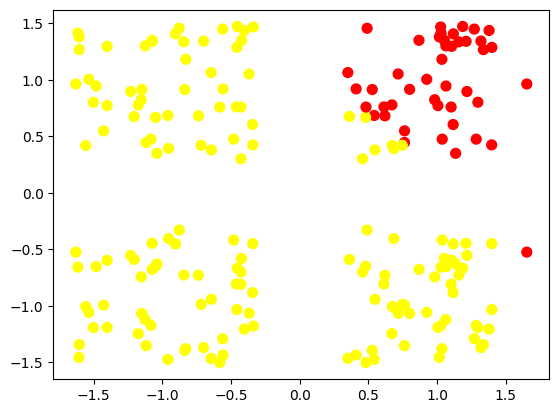

In [20]:

plt.scatter(X[:, 0], X[:, 1], c=pred, s=50, cmap='autumn')
plt.show()

In [21]:

model = MLPClassifier(activation='relu',
                      max_iter=10000,
                      hidden_layer_sizes=(4)
                      )
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

1.0

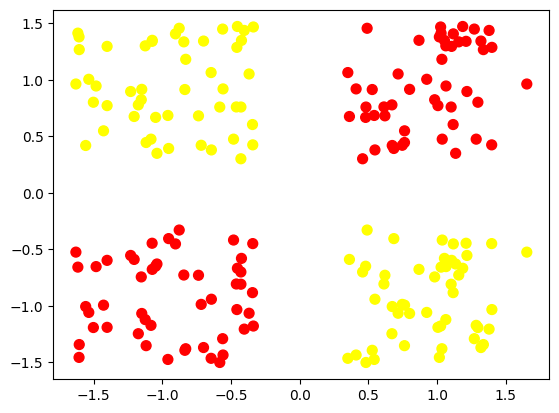

In [22]:

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='autumn')
plt.show()